#What I learned

###1. inferring an unknown vector

※ remind: $\Sigma$ : covariance matrix



###likelihood's gaussian form:
$$p(y|z) = \frac{1}{\sqrt{(2\pi)^D |\Sigma_y|}} \exp \left( -\frac{1}{2}(y-z)^T \Sigma_y^{-1} (y-z) \right)$$

###log likelihood:
$$\log(p(y_{1}|z)p(y_{2}|z)) = K_{1} - \frac{1}{2}(z^{T}\Sigma_{y}^{-1}z - 2z^{T}\Sigma_{y}^{-1}y_{1}) - \frac{1}{2}(z^{T}\Sigma_{y}^{-1}z - 2z^{T}\Sigma_{y}^{-1}y_{2})$$
$$= K_{1} - \frac{1}{2}(z^{T} 2\Sigma_{y}^{-1}z - 2z^{T}\Sigma_{y}^{-1}(y_{1} + y_{2}))$$
$$= K_{1} - \frac{1}{2}(z^{T} 2\Sigma_{y}^{-1}z - 2z^{T} 2\Sigma_{y}^{-1}\bar{y})$$
$$= K_{2} + \log \mathcal{N}(z \mid \bar{y}, \frac{\Sigma_{y}}{2})$$
$$= K_{2} + \log \mathcal{N}(\bar{y} \mid z, \frac{\Sigma_{y}}{2}) \ \ (\text{quadratic form trick})$$

###posterior distribution
$$\text{bayesian probability: } p(z|\mathcal{D}) \propto p(z) \times p(\mathcal{D}|z)$$
$$$$
$$\log p(z|\mathcal{D}) = \log p(z) + \log p(\mathcal{D}|z) + \text{(const)}$$
$$$$
$$\text{posterior distribution used bayesian:} \ \ p(z \mid y_{1}, \dots, y_{N}) = \mathcal{N}(z \mid \hat{\mu}, \hat{\Sigma})$$
$$\text{posterior precision matrix: } \ \ \hat{\Sigma}^{-1} = \Sigma_z^{-1} + N\Sigma_y^{-1}$$
$$\text{posterior mean vector: } \ \ \hat{\mu} = \hat{\Sigma}(\Sigma_y^{-1}(N\bar{y}) + \Sigma_z^{-1}\mu_z) $$

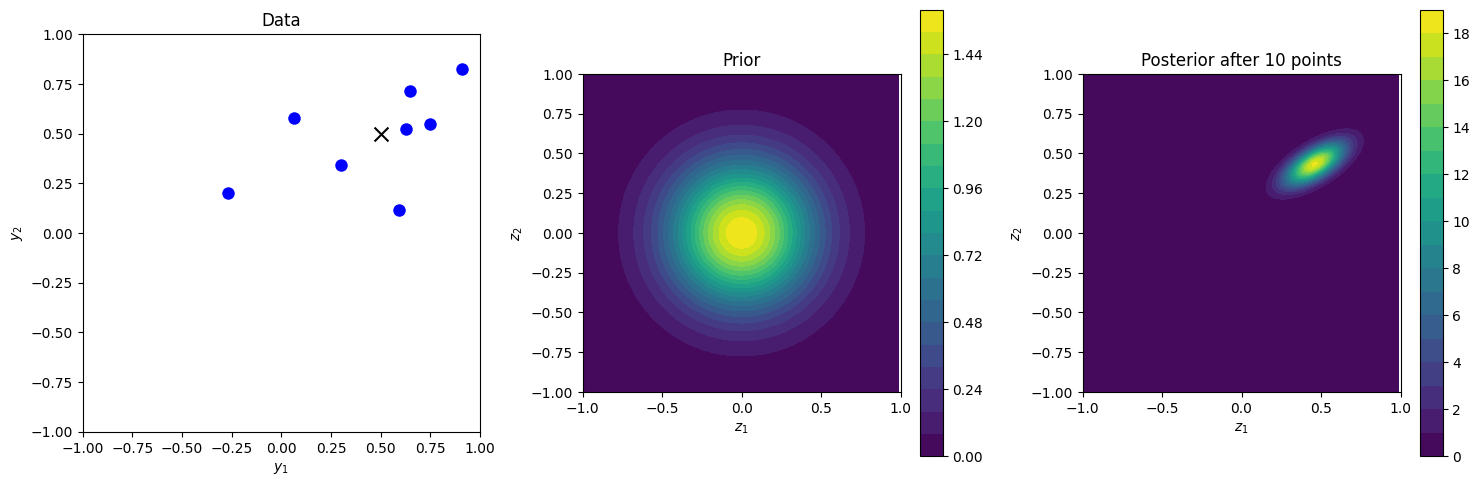

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# 1. 파라미터 설정 (이미지 캡션 데이터 반영)
z_true = np.array([0.5, 0.5])                     # 실제 위치 (Black Cross) [cite: 18]
Sigma_y = 0.1 * np.array([[2, 1], [1, 1]])        # 측정 노이즈 공분산
mu_0 = np.array([0, 0])                           # 사전 평균 [cite: 4]
Sigma_0 = 0.1 * np.eye(2)                         # 사전 공분산 (0.1 * I)
N = 10                                            # 관측 데이터 개수 [cite: 5]

# 2. 데이터 생성 (Data Generation)
np.random.seed(42)
y_n = np.random.multivariate_normal(z_true, Sigma_y, N)
y_bar = np.mean(y_n, axis=0)                      # 표본 평균 [cite: 5]

# 3. 사후 분포 계산 (Inference)
# 식 3.67: 사후 정밀도 행렬 계산
inv_Sigma_0 = np.linalg.inv(Sigma_0)
inv_Sigma_y = np.linalg.inv(Sigma_y)
inv_Sigma_post = inv_Sigma_0 + N * inv_Sigma_y
Sigma_post = np.linalg.inv(inv_Sigma_post)

# 식 3.68: 사후 평균 벡터 계산
mu_post = Sigma_post @ (inv_Sigma_y @ (N * y_bar) + inv_Sigma_0 @ mu_0)

# 4. 시각화 (Plotting)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))

# (a) Data plot
axes[0].scatter(y_n[:, 0], y_n[:, 1], c='blue', edgecolors='white', s=100, label='Data')
axes[0].scatter(z_true[0], z_true[1], c='black', marker='x', s=100, label='True z')
axes[0].set_title("Data")

# (b) Prior plot
rv_prior = multivariate_normal(mu_0, Sigma_0)
cf1 = axes[1].contourf(x, y, rv_prior.pdf(pos), levels=20, cmap='viridis')
fig.colorbar(cf1, ax=axes[1])
axes[1].set_title("Prior")

# (c) Posterior plot (after 10 points)
rv_post = multivariate_normal(mu_post, Sigma_post)
cf2 = axes[2].contourf(x, y, rv_post.pdf(pos), levels=20, cmap='viridis')
fig.colorbar(cf2, ax=axes[2])
axes[2].set_title(f"Posterior after {N} points")

# 공통 설정
for i, ax in enumerate(axes):
    ax.set_xlim([-1, 1]); ax.set_ylim([-1, 1])
    ax.set_xlabel('$z_1$'); ax.set_ylabel('$z_2$')
    if i == 0: ax.set_xlabel('$y_1$'); ax.set_ylabel('$y_2$')
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

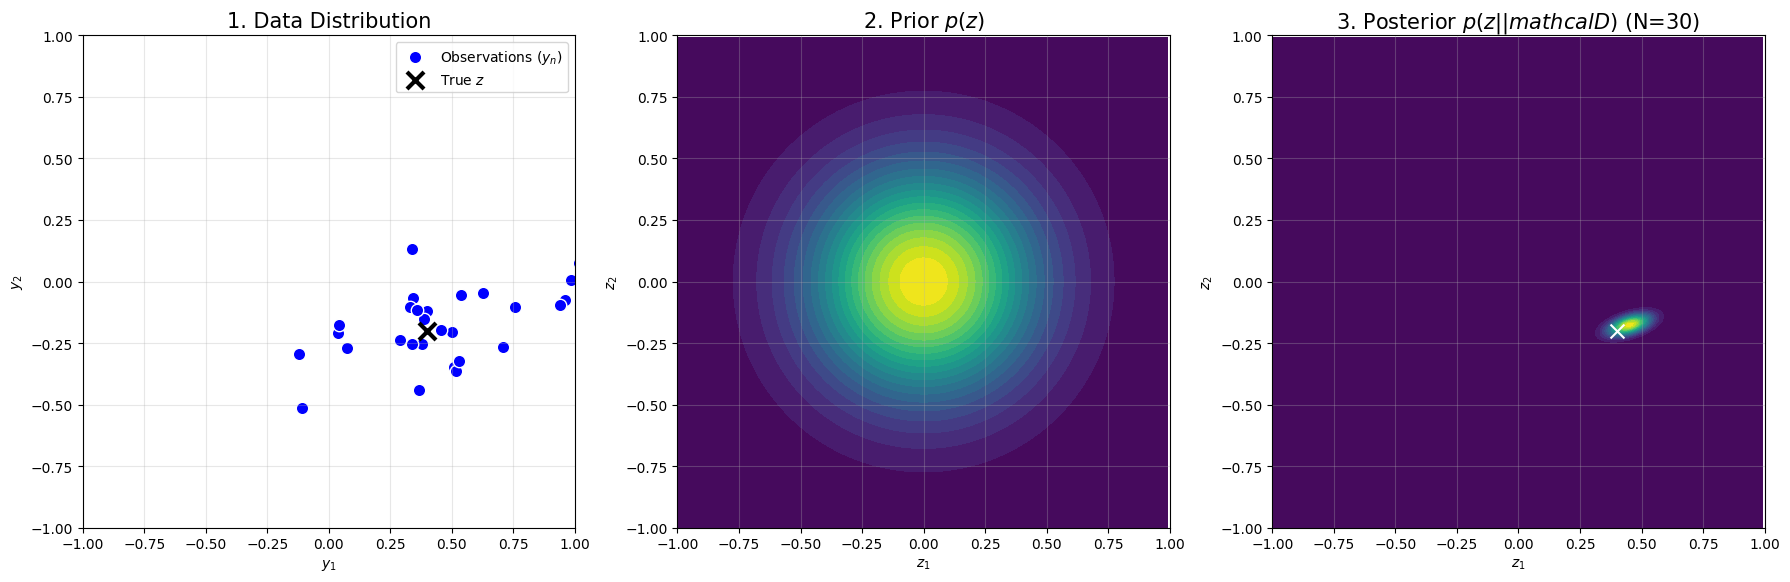

In [28]:
# @title 기본 제목 텍스트
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# 1. 시뮬레이션 환경 설정
np.random.seed()

# 실제 정답 (Hidden state z)
z_true = np.array([0.4, -0.2])

# 사전 분포 (Prior): 평균은 0, 불확실성은 큰 상태 (둥근 형태)
mu_0 = np.array([0.0, 0.0])
Sigma_0 = np.eye(2) * 0.1

# 측정 노이즈 (Sensor Noise Sigma_y): x축과 y축의 정밀도가 다른 비대칭성 부여
# 대각선 성분이 [0.1, 0.025] 정도로 y축이 더 정밀하다고 가정
Sigma_y = 0.05 * np.array([[2.0, 0.5],
                           [0.5, 0.5]])

# 데이터 생성: 10개의 관측치 (Radar Blips)
N = 30
Y = np.random.multivariate_normal(z_true, Sigma_y, N)
y_bar = np.mean(Y, axis=0)

# 2. 사후 분포 계산 (식 3.67, 3.68)
inv_Sigma_0 = np.linalg.inv(Sigma_0)
inv_Sigma_y = np.linalg.inv(Sigma_y)

# [식 3.67] 사후 정밀도(Precision) 합산: inv_Sigma_post = inv_Sigma_0 + N * inv_Sigma_y
inv_Sigma_post = inv_Sigma_0 + N * inv_Sigma_y
Sigma_post = np.linalg.inv(inv_Sigma_post)

# [식 3.68] 사후 평균(Mean) 계산: mu_post = Sigma_post * (inv_Sigma_y * N * y_bar + inv_Sigma_0 * mu_0)
mu_post = Sigma_post @ (inv_Sigma_y @ (N * y_bar) + inv_Sigma_0 @ mu_0)

# 3. 시각화 (3개의 서브플롯)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
x_range, y_range = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x_range, y_range))

# --- Plot 1: Data (관측 데이터의 분포) ---
axes[0].scatter(Y[:, 0], Y[:, 1], c='blue', marker='o', edgecolors='white', s=80, label='Observations ($y_n$)')
axes[0].scatter(z_true[0], z_true[1], c='black', marker='x', s=150, lw=3, label='True $z$')
axes[0].set_title('1. Data Distribution', fontsize=15)
axes[0].set_xlabel('$y_1$'); axes[0].set_ylabel('$y_2$')
axes[0].legend()

# --- Plot 2: Prior (사전 분포) ---
# 데이터가 없을 때 우리가 가진 가우시안 정보
rv_prior = multivariate_normal(mu_0, Sigma_0)
axes[1].contourf(x_range, y_range, rv_prior.pdf(pos), levels=20, cmap='viridis')
axes[1].set_title('2. Prior $p(z)$', fontsize=15)
axes[1].set_xlabel('$z_1$'); axes[1].set_ylabel('$z_2$')

# --- Plot 3: Posterior (사후 분포) ---
# 데이터를 반영한 후 업데이트된 가우시안 정보
rv_post = multivariate_normal(mu_post, Sigma_post)
axes[2].contourf(x_range, y_range, rv_post.pdf(pos), levels=20, cmap='viridis')
axes[2].scatter(z_true[0], z_true[1], c='white', marker='x', s=100, label='True $z$')
axes[2].set_title(f'3. Posterior $p(z||mathcal{{D}})$ (N={N})', fontsize=15)
axes[2].set_xlabel('$z_1$'); axes[2].set_ylabel('$z_2$')

# 공통 설정 (축 범위 및 격자)
for ax in axes:
    ax.set_xlim([-1, 1]); ax.set_ylim([-1, 1])
    ax.set_aspect('equal')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()